In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



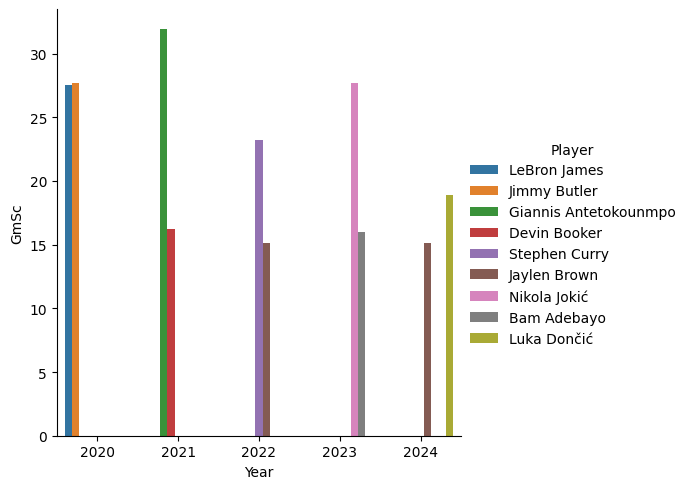

In [19]:
import pandas
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

lakers_finals_player_2020 = pd.read_csv("nbafinalsplayersstatsL5years/lakers2020finals.csv", nrows=1)
heat_finals_player_2020 = pd.read_csv("nbafinalsplayersstatsL5years/heat2020finals.csv", nrows=1)
bucks_finals_player_2021 = pd.read_csv("nbafinalsplayersstatsL5years/bucks2021finals.csv", nrows=1)
suns_finals_player_2021 = pd.read_csv("nbafinalsplayersstatsL5years/suns2021finals.csv", nrows=1)
warriors_finals_player_2022 = pd.read_csv("nbafinalsplayersstatsL5years/warriors2022finals.csv", nrows=1)
celtics_finals_player_2022 = pd.read_csv("nbafinalsplayersstatsL5years/celtics2022finals.csv", nrows=1)
nuggets_finals_player_2023 = pd.read_csv("nbafinalsplayersstatsL5years/nuggets2023finals.csv", nrows=1)
heat_finals_player_2023 = pd.read_csv("nbafinalsplayersstatsL5years/heat2023finals.csv", nrows=1)
celtics_finals_player_2024 = pd.read_csv("nbafinalsplayersstatsL5years/celtics2022finals.csv", nrows=1)
mavs_finals_player_2024 = pd.read_csv("nbafinalsplayersstatsL5years/mavs2024finals.csv", nrows=1)

combined_finals_player = pandas.concat([lakers_finals_player_2020,
                                             heat_finals_player_2020])
combined_finals_player_2021 = pandas.concat([bucks_finals_player_2021,
                                           suns_finals_player_2021])
combined_finals_player = pandas.concat([combined_finals_player,
                                             combined_finals_player_2021])
combined_finals_player_2022 = pandas.concat([warriors_finals_player_2022,
                                           celtics_finals_player_2022])
combined_finals_player = pandas.concat([combined_finals_player,
                                             combined_finals_player_2022])
combined_finals_player_2023 = pandas.concat([nuggets_finals_player_2023,
                                           heat_finals_player_2023])
combined_finals_player = pandas.concat([combined_finals_player,
                                             combined_finals_player_2023])
combined_finals_player_2024 = pandas.concat([celtics_finals_player_2024,
                                           mavs_finals_player_2024])
combined_finals_player = pandas.concat([combined_finals_player,
                                             combined_finals_player_2024])

combined_finals_player.iloc[0,combined_finals_player.columns.get_loc('Rk')]=2020
combined_finals_player.iloc[1,combined_finals_player.columns.get_loc('Rk')]=2020
combined_finals_player.iloc[2,combined_finals_player.columns.get_loc('Rk')]=2021
combined_finals_player.iloc[3,combined_finals_player.columns.get_loc('Rk')]=2021
combined_finals_player.iloc[4,combined_finals_player.columns.get_loc('Rk')]=2022
combined_finals_player.iloc[5,combined_finals_player.columns.get_loc('Rk')]=2022
combined_finals_player.iloc[6,combined_finals_player.columns.get_loc('Rk')]=2023
combined_finals_player.iloc[7,combined_finals_player.columns.get_loc('Rk')]=2023
combined_finals_player.iloc[8,combined_finals_player.columns.get_loc('Rk')]=2024
combined_finals_player.iloc[9,combined_finals_player.columns.get_loc('Rk')]=2024


combined_finals_player.rename(columns={"Rk": "Year"}, inplace=True)

sns.catplot(data=combined_finals_player, kind = "bar",
            x="Year", y="GmSc", hue = "Player")
plt.show()




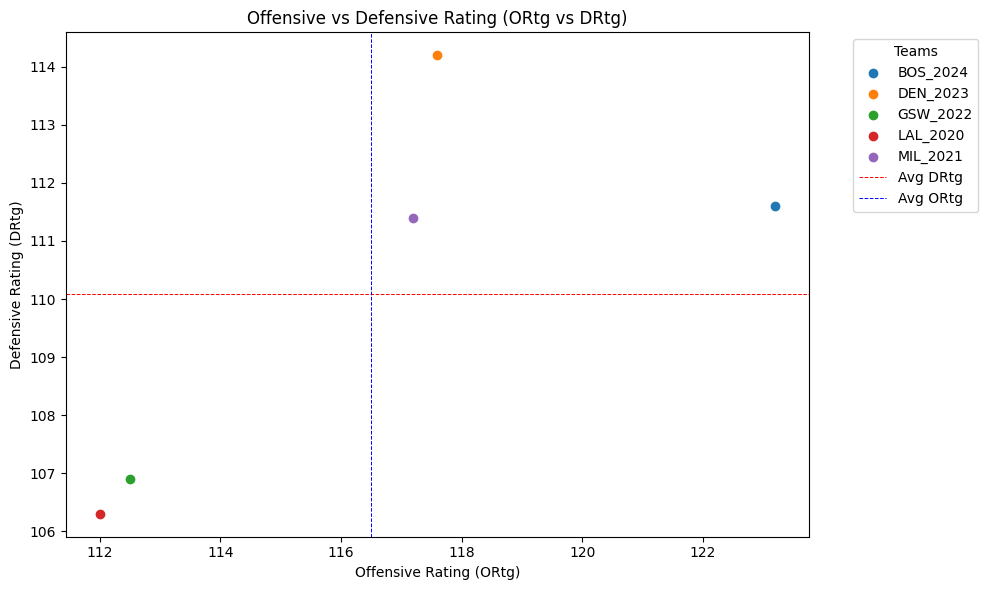

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
team_files = {
    "GSW_2022": "advancedteamstats/GSW_2022_Team_Misc_Stats.csv",
    "LAL_2020": "advancedteamstats/LAL_2020_Team_Misc_Stats.csv",
    "MIL_2021": "advancedteamstats/Milwaukee_Bucks_2021_Team_Misc_Stats.csv",
    "BOS_2024": "advancedteamstats/Boston_Celtics_2024_Team_Misc_Stats.csv",
    "DEN_2023": "advancedteamstats/Denver_Nuggets_2023_Team_Misc_Stats.csv",
}

# Initialize a DataFrame for all teams
combined_team_data = pd.DataFrame()

# Load data from each file
for team, file_path in team_files.items():
    team_data = pd.read_csv(file_path)
    team_data['Team'] = team  # Add a column for team identifier
    combined_team_data = pd.concat([combined_team_data, team_data])

# Filter the dataset for Offensive Rating (ORtg) and Defensive Rating (DRtg)
filtered_data = combined_team_data[combined_team_data['Category'].isin(['ORtg', 'DRtg'])]

# Pivot the data so that ORtg and DRtg become columns
pivoted_data = filtered_data.pivot(index=['Team', 'Year'], columns='Category', values='TeamR').reset_index()

# Convert ORtg and DRtg to numeric (if not already)
pivoted_data['ORtg'] = pd.to_numeric(pivoted_data['ORtg'], errors='coerce')
pivoted_data['DRtg'] = pd.to_numeric(pivoted_data['DRtg'], errors='coerce')

# Plot the scatter plot
plt.figure(figsize=(10, 6))
for team in pivoted_data['Team'].unique():
    team_data = pivoted_data[pivoted_data['Team'] == team]
    plt.scatter(team_data['ORtg'], team_data['DRtg'], label=team)

# Add plot details
plt.title("Offensive vs Defensive Rating (ORtg vs DRtg)")
plt.xlabel("Offensive Rating (ORtg)")
plt.ylabel("Defensive Rating (DRtg)")
plt.axhline(y=pivoted_data['DRtg'].mean(), color='red', linestyle='--', linewidth=0.7, label="Avg DRtg")
plt.axvline(x=pivoted_data['ORtg'].mean(), color='blue', linestyle='--', linewidth=0.7, label="Avg ORtg")
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


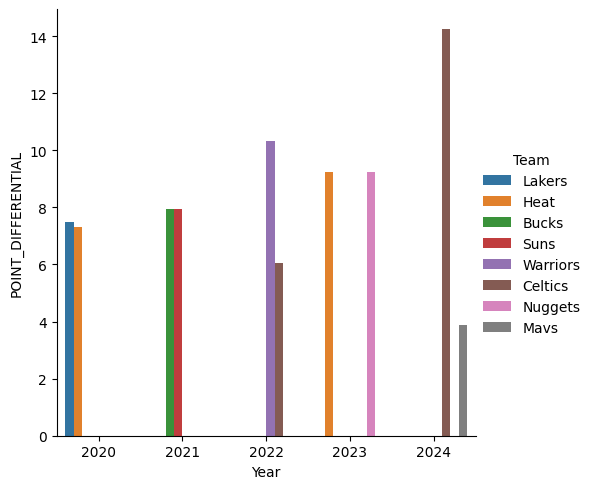

In [1]:
import pandas
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

lakers_points_2020 = pd.read_csv("homerecords/lakers_home_record_with_point_differentials_2019_2020.csv")
lakers_points_2020.rename(columns={"GAME_DATE": "Year"}, inplace=True)
lakers_points_2020["Year"] = 2020
lakers_points_2020.rename(columns={"MATCHUP": "Team"}, inplace=True)
lakers_points_2020["Team"] = "Lakers"
lakers_points_2020.drop(["PTS"],
                             axis=1 , inplace=True)

heat_points_2020 = pd.read_csv("homerecords/heat_home_record_with_point_differentials_2019_2020.csv")
heat_points_2020.rename(columns={"GAME_DATE": "Year"}, inplace=True)
heat_points_2020["Year"] = 2020
heat_points_2020.rename(columns={"MATCHUP": "Team"}, inplace=True)
heat_points_2020["Team"] = "Heat"
heat_points_2020.drop(["PTS"],
                             axis=1 , inplace=True)

bucks_points_2021 = pd.read_csv("homerecords/bucks_home_record_with_point_differentials_2020_2021.csv")
bucks_points_2021.rename(columns={"GAME_DATE": "Year"}, inplace=True)
bucks_points_2021["Year"] = 2021
bucks_points_2021.rename(columns={"MATCHUP": "Team"}, inplace=True)
bucks_points_2021["Team"] = "Bucks"
bucks_points_2021.drop(["PTS"],
                             axis=1 , inplace=True)

suns_points_2021 = pd.read_csv("homerecords/bucks_home_record_with_point_differentials_2020_2021.csv")
suns_points_2021.rename(columns={"GAME_DATE": "Year"}, inplace=True)
suns_points_2021["Year"] = 2021
suns_points_2021.rename(columns={"MATCHUP": "Team"}, inplace=True)
suns_points_2021["Team"] = "Suns"
suns_points_2021.drop(["PTS"],
                             axis=1 , inplace=True)

warriors_points_2022 = pd.read_csv("homerecords/warriors_home_record_with_point_differentials_2021_2022.csv")
warriors_points_2022.rename(columns={"GAME_DATE": "Year"}, inplace=True)
warriors_points_2022["Year"] = 2022
warriors_points_2022.rename(columns={"MATCHUP": "Team"}, inplace=True)
warriors_points_2022["Team"] = "Warriors"
warriors_points_2022.drop(["PTS"],
                             axis=1 , inplace=True)

celtics_points_2022 = pd.read_csv("homerecords/celtics_home_record_with_point_differentials_2021_2022.csv")
celtics_points_2022.rename(columns={"GAME_DATE": "Year"}, inplace=True)
celtics_points_2022["Year"] = 2022
celtics_points_2022.rename(columns={"MATCHUP": "Team"}, inplace=True)
celtics_points_2022["Team"] = "Celtics"
celtics_points_2022.drop(["PTS"],
                             axis=1 , inplace=True)

nuggets_points_2023 = pd.read_csv("homerecords/denver_nuggets_home_record_with_point_differentials_2022_2023.csv")
nuggets_points_2023.rename(columns={"GAME_DATE": "Year"}, inplace=True)
nuggets_points_2023["Year"] = 2023
nuggets_points_2023.rename(columns={"MATCHUP": "Team"}, inplace=True)
nuggets_points_2023["Team"] = "Nuggets"
nuggets_points_2023.drop(["PTS"],
                             axis=1 , inplace=True)

heat_points_2023 = pd.read_csv("homerecords/denver_nuggets_home_record_with_point_differentials_2022_2023.csv")
heat_points_2023.rename(columns={"GAME_DATE": "Year"}, inplace=True)
heat_points_2023["Year"] = 2023
heat_points_2023.rename(columns={"MATCHUP": "Team"}, inplace=True)
heat_points_2023["Team"] = "Heat"
heat_points_2023.drop(["PTS"],
                             axis=1 , inplace=True)


celtics_points_2024 = pd.read_csv("homerecords/boston_celtics_home_record_with_point_differentials_2023_2024.csv")
celtics_points_2024.rename(columns={"GAME_DATE": "Year"}, inplace=True)
celtics_points_2024["Year"] = 2024
celtics_points_2024.rename(columns={"MATCHUP": "Team"}, inplace=True)
celtics_points_2024["Team"] = "Celtics"
celtics_points_2024.drop(["PTS"],
                             axis=1 , inplace=True)


mavs_points_2024 = pd.read_csv("homerecords/dallas_mavericks_home_record_with_point_differentials_2023_2024.csv")
mavs_points_2024.rename(columns={"GAME_DATE": "Year"}, inplace=True)
mavs_points_2024["Year"] = 2024
mavs_points_2024.rename(columns={"MATCHUP": "Team"}, inplace=True)
mavs_points_2024["Team"] = "Mavs"
mavs_points_2024.drop(["PTS"],
                             axis=1 , inplace=True)

combined_points = pandas.concat([lakers_points_2020,heat_points_2020])
points_2021 = pandas.concat([bucks_points_2021,suns_points_2021])
combined_points = pandas.concat([combined_points,points_2021])
points_2022 = pandas.concat([warriors_points_2022,celtics_points_2022])
combined_points = pandas.concat([combined_points,points_2022])
points_2023 = pandas.concat([nuggets_points_2023,heat_points_2023])
combined_points = pandas.concat([combined_points,points_2023])
points_2024 = pandas.concat([celtics_points_2024,mavs_points_2024])
combined_points = pandas.concat([combined_points,points_2024])


sns.catplot(data=combined_points, kind = "bar",
            x="Year", y="POINT_DIFFERENTIAL", hue="Team", errorbar=None)
plt.show()

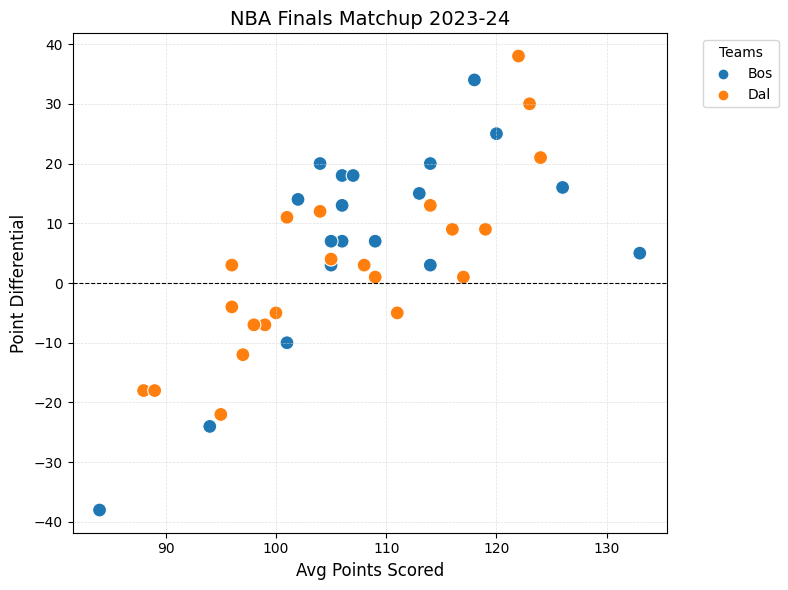

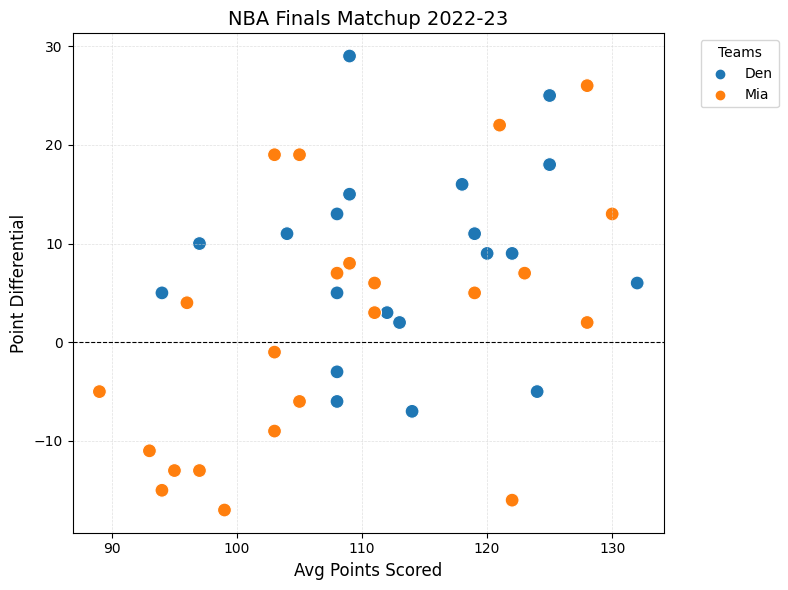

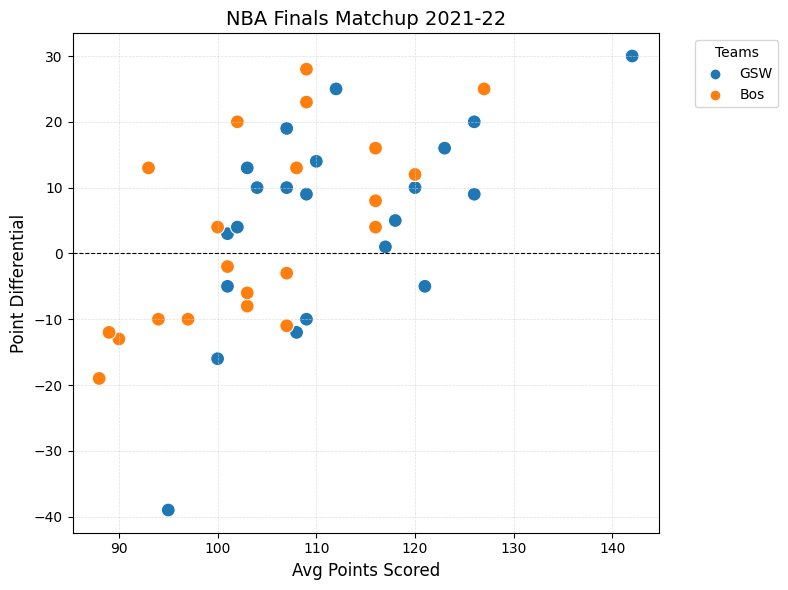

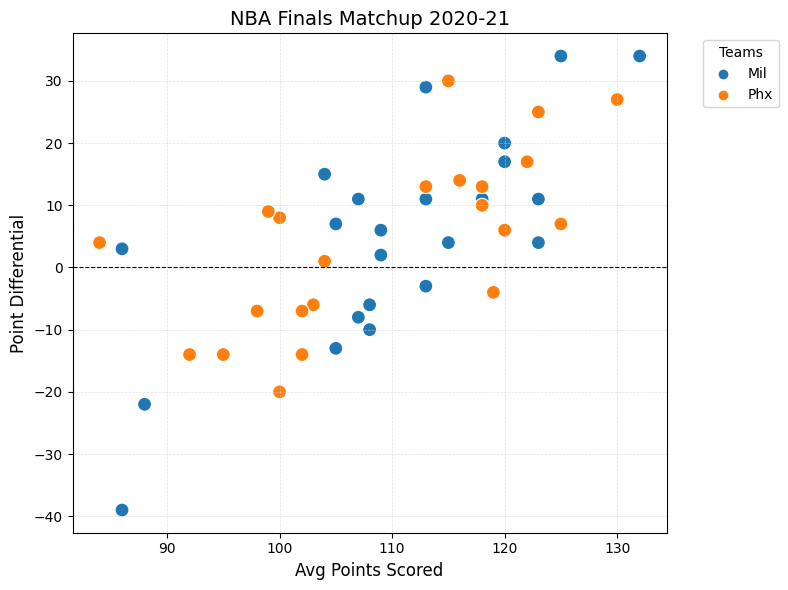

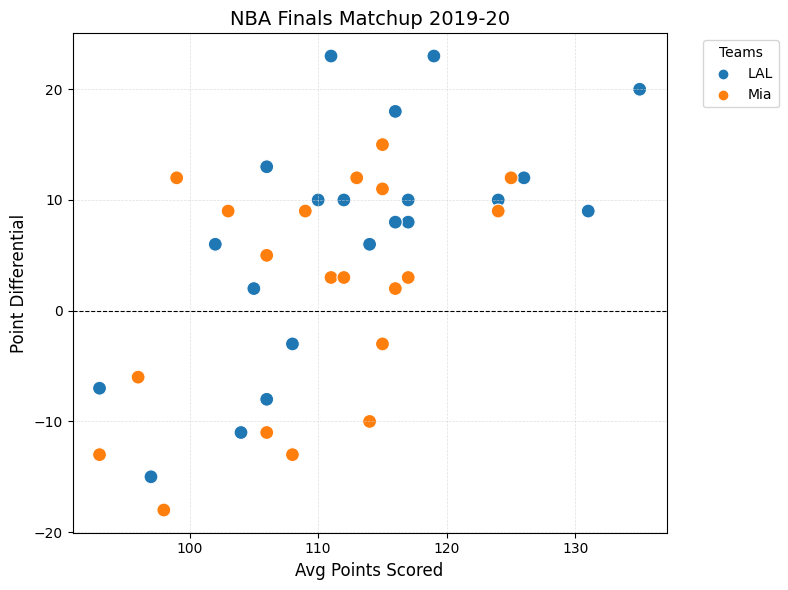

In [17]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data
finals = pd.read_csv("finalsmatchupsplayoffs/refined_finals_data.csv")

# Replace Team_IDs with team abbreviations
team_replacements = {
    1610612738: "Bos",  # Boston Celtics
    1610612742: "Dal",  # Dallas Mavericks
    1610612743: "Den",  # Denver Nuggets
    1610612748: "Mia",  # Miami Heat
    1610612744: "GSW",  # Golden State Warriors
    1610612749: "Mil",  # Milwaukee Bucks
    1610612756: "Phx",  # Phoenix Suns
    1610612747: "LAL",  # Los Angeles Lakers
}
finals.replace(team_replacements, inplace=True)

# Calculate point differential
finals["Point Differential"] = finals["Avg_Points_Scored"] - finals["Avg_Points_Allowed"]

# Group by season to create separate plots
unique_seasons = finals["Season"].unique()

for season in unique_seasons:
    # Filter data for the specific season
    season_data = finals[finals["Season"] == season]

    # Set up the plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=season_data,
        x="Avg_Points_Scored",
        y="Point Differential",
        hue="Team_ID",
        palette="tab10",
        s=100,  # Size of points
    )

    # Add title and labels
    plt.title(f"NBA Finals Matchup {season}", fontsize=14)
    plt.xlabel("Avg Points Scored", fontsize=12)
    plt.ylabel("Point Differential", fontsize=12)

    # Customize grid and legend
    plt.grid(color="lightgray", linestyle="--", linewidth=0.5, alpha=0.7)
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")  # Horizontal reference line
    plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

    # Show plot
    plt.tight_layout()
    plt.show()


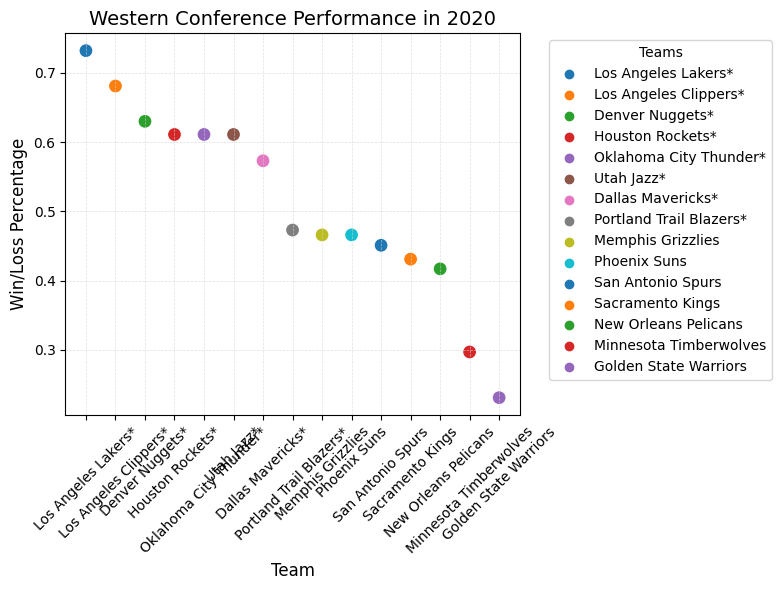

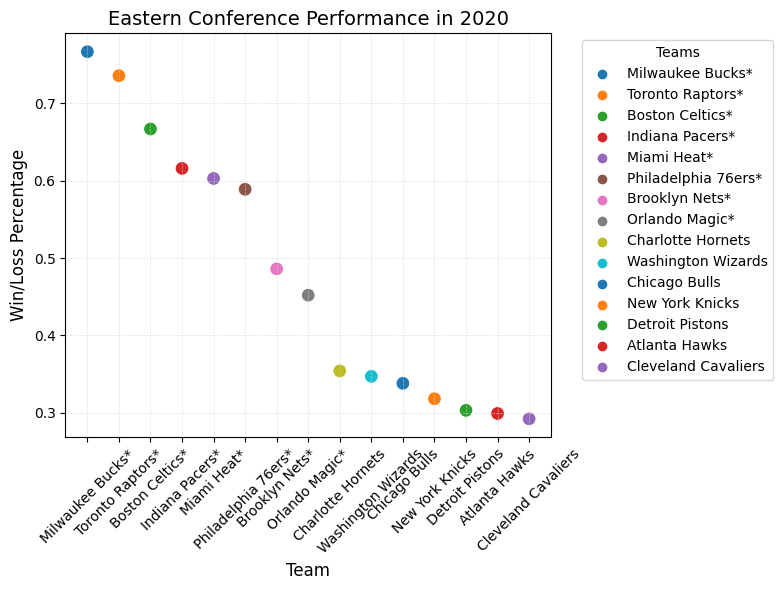

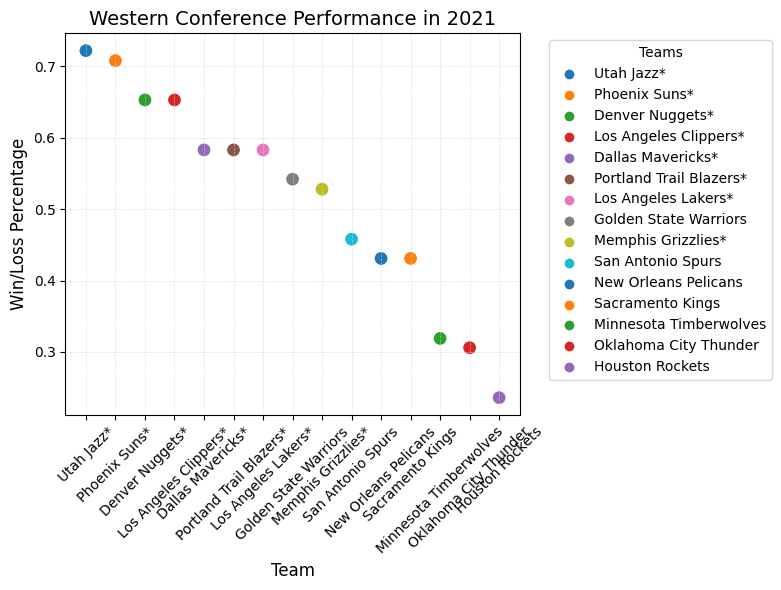

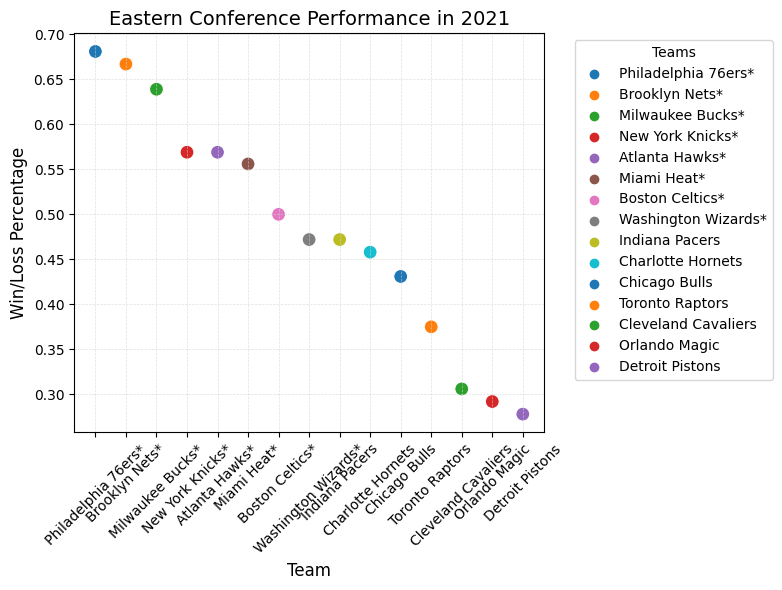

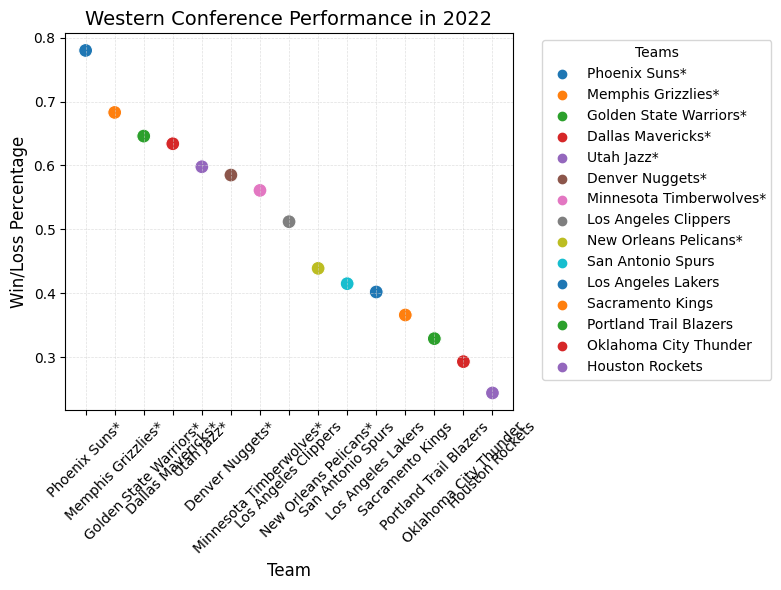

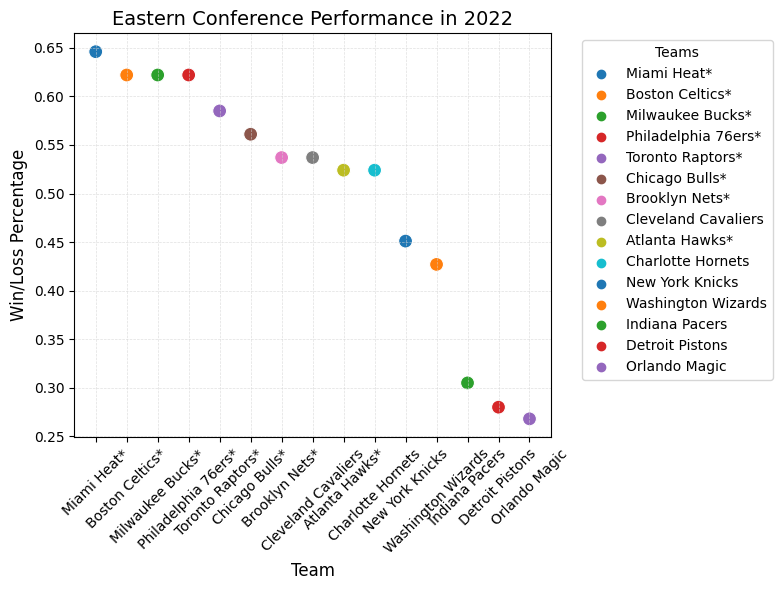

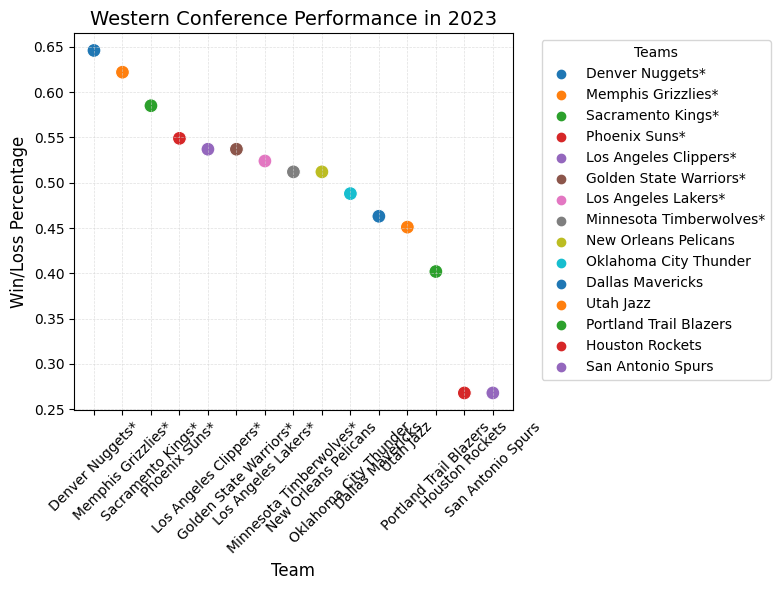

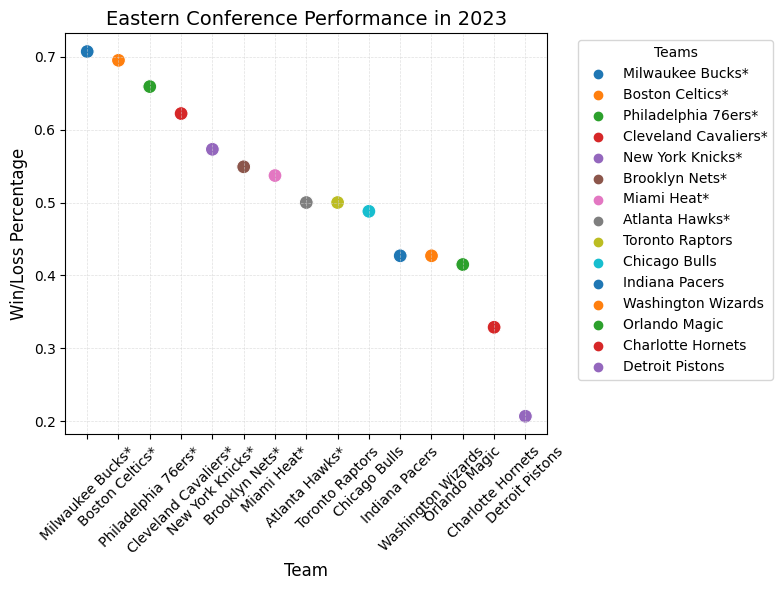

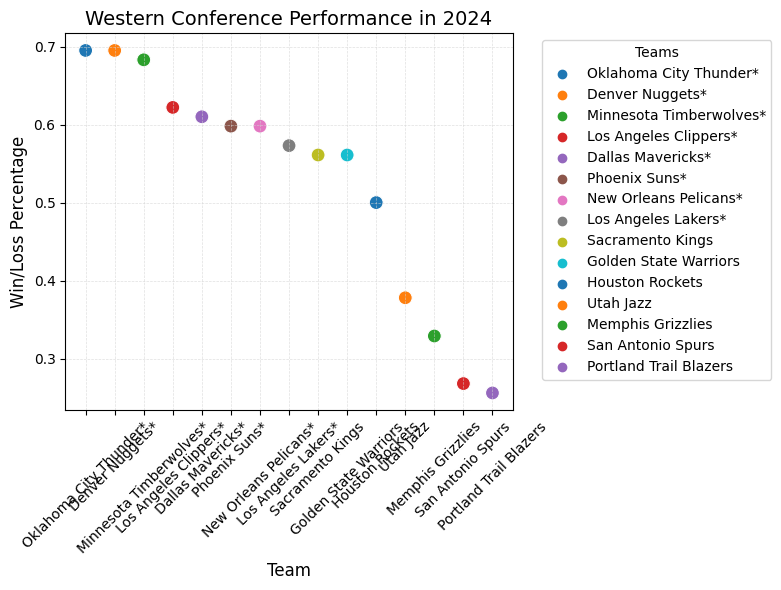

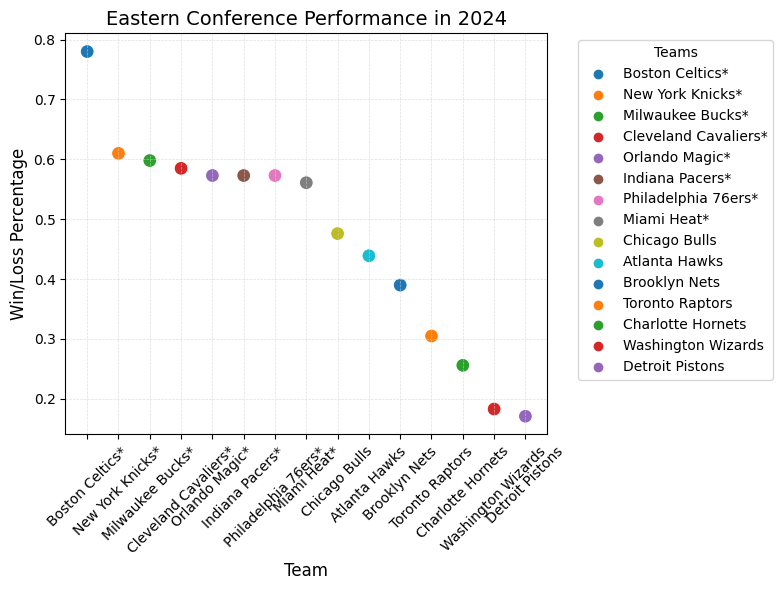

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from the provided CSV files
western_conference_files = [
    "last5seasonsrecords/NBA_2020_Western_Conference_StandingsN_updated.csv",
    "last5seasonsrecords/NBA_2021_Western_Conference_StandingsN_updated.csv",
    "last5seasonsrecords/NBA_2022_Western_Conference_StandingsN_updated.csv",
    "last5seasonsrecords/NBA_2023_Western_Conference_StandingsN_updated.csv",
    "last5seasonsrecords/NBA_2024_Western_Conference_StandingsN_updated.csv"
]

eastern_conference_files = [
    "last5seasonsrecords/NBA_2020_Eastern_Conference_StandingsN_updated.csv",
    "last5seasonsrecords/NBA_2021_Eastern_Conference_StandingsN_updated.csv",
    "last5seasonsrecords/NBA_2022_Eastern_Conference_StandingsN_updated.csv",
    "last5seasonsrecords/NBA_2023_Eastern_Conference_StandingsN_updated.csv",
    "last5seasonsrecords/NBA_2024_Eastern_Conference_StandingsN_updated.csv"
]

def load_and_process_data(files, conference_label):
    dfs = []
    for file, year in zip(files, range(2020, 2025)):
        df = pd.read_csv(file)
        df.rename(columns={"Team": "Team"}, inplace=True)  # Ensure consistent naming
        df["Year"] = year
        df["Conference"] = conference_label  # Add conference label
        # Retain only relevant columns
        relevant_columns = ["Team", "Year", "W/L%", "Conference"]
        df = df[relevant_columns]
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# Load and process data for both conferences
western_conference_data = load_and_process_data(western_conference_files, "Western")
eastern_conference_data = load_and_process_data(eastern_conference_files, "Eastern")

# Combine both conferences
combined_conferences = pd.concat([western_conference_data, eastern_conference_data], ignore_index=True)

# Generate scatter plots for each year and conference
for year in combined_conferences["Year"].unique():
    for conference in ["Western", "Eastern"]:
        # Filter data for the specific year and conference
        year_conference_data = combined_conferences[
            (combined_conferences["Year"] == year) & 
            (combined_conferences["Conference"] == conference)
        ]
        
        # Create the scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(
            data=year_conference_data,
            x="Team",
            y="W/L%",
            hue="Team",
            palette="tab10",
            s=100  # Adjust point size
        )
        
        # Add titles and labels
        plt.title(f"{conference} Conference Performance in {year}", fontsize=14)
        plt.xlabel("Team", fontsize=12)
        plt.ylabel("Win/Loss Percentage", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)  # Rotate team names for better readability
        
        # Customize grid and legend
        plt.grid(color="lightgray", linestyle="--", linewidth=0.5, alpha=0.7)
        plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
        
        # Show the plot
        plt.tight_layout()
        plt.show()


c:\Users\19092\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


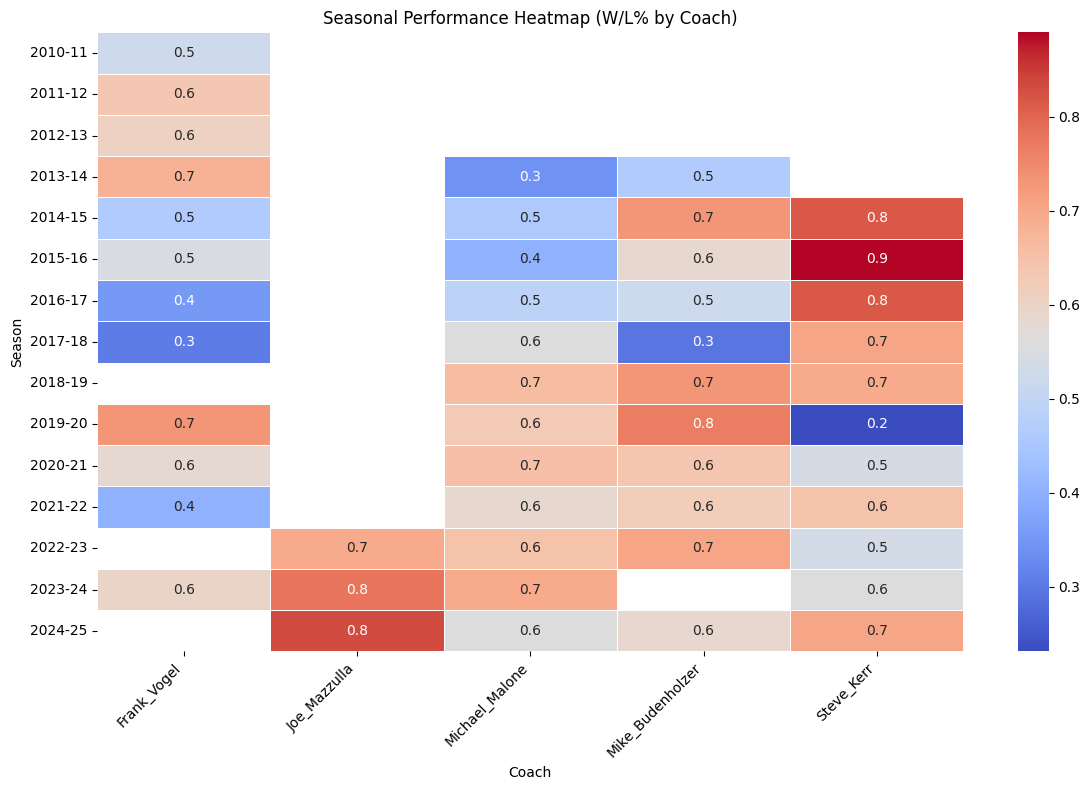

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
file_paths = [
    "championcoaches/Michael_Malone_Coaching_Record_Cleaned_Output.csv",
    "championcoaches/Mike_Budenholzer_Coaching_Record_Cleaned_Output.csv",
    "championcoaches/Steve_Kerr_Coaching_Record_Cleaned_Output.csv",
    "championcoaches/Frank_Vogel_Coaching_Record_Cleaned_Output.csv",
    "championcoaches/Joe_Mazzulla_Coaching_Record_Cleaned_Output.csv",
]

# Combine all files into one DataFrame with an identifier for each coach
combined_data = pd.concat(
    [pd.read_csv(file_path).assign(Coach=file_path.split("/")[-1].replace("_Coaching_Record_Cleaned_Output.csv", "")) for file_path in file_paths]
)

# Select relevant columns for the heatmap
relevant_columns = ['Season', 'W', 'L', 'W/L%', 'W > .500']
processed_data = combined_data[relevant_columns + ['Coach']]

# Convert appropriate columns to numeric for heatmap
for col in ['W', 'L', 'W/L%', 'W > .500']:
    processed_data[col] = pd.to_numeric(processed_data[col], errors='coerce')

# Create pivot table for heatmap (rows as seasons, columns as metrics, values as one metric at a time)
heatmap_data = processed_data.pivot(index='Season', columns='Coach', values='W/L%')  # Example for wins

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Seasonal Performance Heatmap (W/L% by Coach)")
plt.ylabel("Season")
plt.xlabel("Coach")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


c:\Users\19092\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


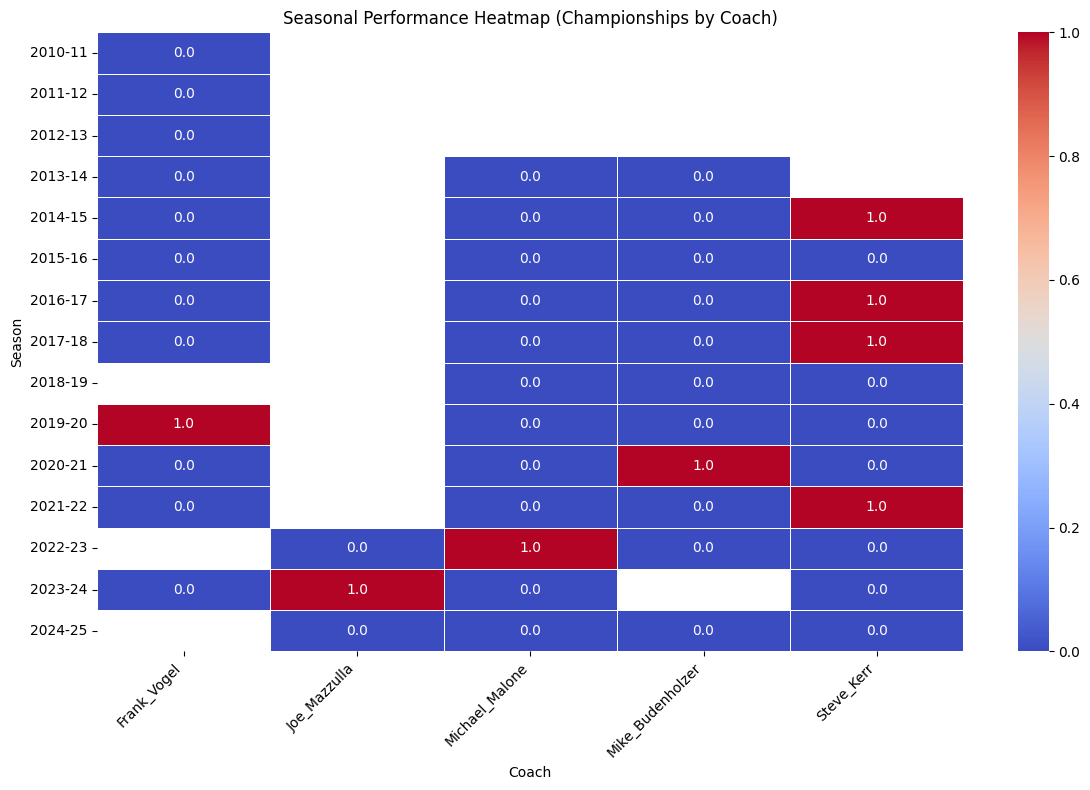

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
file_paths = [
    "championcoaches/Michael_Malone_Coaching_Record_Cleaned_Output.csv",
    "championcoaches/Mike_Budenholzer_Coaching_Record_Cleaned_Output.csv",
    "championcoaches/Steve_Kerr_Coaching_Record_Cleaned_Output.csv",
    "championcoaches/Frank_Vogel_Coaching_Record_Cleaned_Output.csv",
    "championcoaches/Joe_Mazzulla_Coaching_Record_Cleaned_Output.csv",
]

# Combine all files into one DataFrame with an identifier for each coach
combined_data = pd.concat(
    [pd.read_csv(file_path).assign(Coach=file_path.split("/")[-1].replace("_Coaching_Record_Cleaned_Output.csv", "")) for file_path in file_paths]
)

# Select relevant columns for the heatmap
relevant_columns = ['Season', 'W', 'L', 'W/L%', 'W > .500', 'Champion']
processed_data = combined_data[relevant_columns + ['Coach']]

# Convert appropriate columns to numeric for heatmap
for col in ['W', 'L', 'W/L%', 'W > .500', 'Champion']:
    processed_data[col] = pd.to_numeric(processed_data[col], errors='coerce')

# Create pivot table for heatmap (rows as seasons, columns as metrics, values as one metric at a time)
heatmap_data = processed_data.pivot(index='Season', columns='Coach', values='Champion')  

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Seasonal Performance Heatmap (Championships by Coach)")
plt.ylabel("Season")
plt.xlabel("Coach")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

c:\Users\19092\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


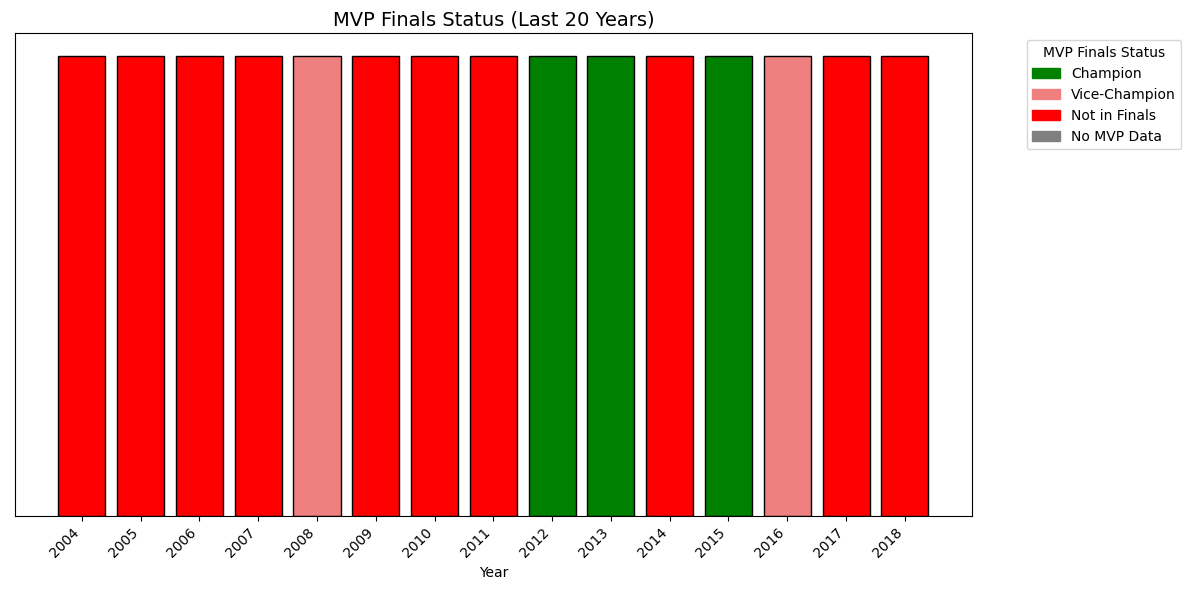

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with NBA Finals and MVP data
mvp_finals_file = "historicalfinals/NBA Finals and MVP.csv"
mvp_finals_data = pd.read_csv(mvp_finals_file)

# Filter the data for the last 20 years
mvp_last_20_years = mvp_finals_data[mvp_finals_data['Year'] >= 2004]

# Add a column for heatmap coloring
def mvp_status(row):
    if pd.isna(row['MVP Team']):
        return "No MVP Data"
    if row['MVP Team'] == row['NBA Champion']:
        return "Champion"
    elif row['MVP Team'] == row['NBA Vice-Champion']:
        return "Vice-Champion"
    else:
        return "Not in Finals"

mvp_last_20_years['MVP Finals Status'] = mvp_last_20_years.apply(mvp_status, axis=1)

# Create a color map for the heatmap
color_map = {
    "Champion": "green",
    "Vice-Champion": "lightcoral",
    "Not in Finals": "red",
    "No MVP Data": "gray"
}

# Plot the heatmap
plt.figure(figsize=(12, 6))
heatmap_colors = [color_map[status] for status in mvp_last_20_years['MVP Finals Status']]

plt.bar(
    mvp_last_20_years['Year'], 
    [1] * len(mvp_last_20_years), 
    color=heatmap_colors, 
    edgecolor="black", 
    width=0.8
)

# Add labels and title
plt.xticks(mvp_last_20_years['Year'], rotation=45, ha='right')
plt.yticks([])  # Remove y-axis ticks
plt.title("MVP Finals Status (Last 20 Years)", fontsize=14)
plt.xlabel("Year")
plt.legend(handles=[
    plt.Rectangle((0, 0), 1, 1, color="green", label="Champion"),
    plt.Rectangle((0, 0), 1, 1, color="lightcoral", label="Vice-Champion"),
    plt.Rectangle((0, 0), 1, 1, color="red", label="Not in Finals"),
    plt.Rectangle((0, 0), 1, 1, color="gray", label="No MVP Data")
], title="MVP Finals Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
